# DLC Training Preprocess

**Plan:**
1. Select videos for training
2. Automatically extract some frames
3. Manually label frames
4. Check manual labeling (and correct it, if necessary)
5. Create training set

**After this notebook finishes:**
1. Copy new project directory to server
2. Run training and evaluation on the server
3. Copy new project directory back from server, replacing current
4. Proceed to postprocess notebook

In [1]:
%matplotlib inline

import deeplabcut

# Append base directory
import os,sys,inspect
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parpath = os.path.dirname(thispath)
sys.path.append(parpath)
print("Appended script directory", parpath)

from lib.qt_wrapper import gui_fname, gui_fnames, gui_fpath
from lib.os_lib import getfiles_walk

Appended script directory /home/sipila/work/dlc-scripts/scripts


In [ ]:
# USER: Enter task parameters
task='JointRunTracking' # Enter the name of your experiment Task
experimenter='Pia'      # Enter the name of the experimenter

# GUI: Select working directory
pwd_workdir = gui_fpath("Select new project directory...", "./")
if pwd_workdir == '':
    raise ValueError("Bad working directory, try again")

# GUI: Select directory to look for videos
pwd_videos = gui_fpath("Select videos directory...", "./")
if pwd_videos == '':
    raise ValueError("Bad video directory, try again")
    
# Automatically find paths to all videos given criteria
allpaths = getfiles_walk(pwd_videos, keys=[".avi"], min_size=int(10**9))
vid_paths = [os.path.join(path, name) for path, name in allpaths]

# DEEPLABCUT: Create new project
path_config_file = deeplabcut.create_new_project(task,experimenter,vid_paths, working_directory=pwd_workdir, copy_videos=False)

<font color='red' size='22'>
Now edit config.yaml by hand if necessary - change body part names and number of frames to pick
</font>

## Extract Frames from video

In [5]:
deeplabcut.extract_frames(path_config_file, 'automatic', 'kmeans', crop=False, userfeedback=False)

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: \\HIFOSRDC10\Workspace\Neurophysiology-Storage2\Gallero\mou_6\2017_07_20\widefield_labview\session01\Matt_files\a 17-07-20 17-11-02.avi ?
yes/noy


30it [00:00, 279.25it/s]

Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2919.53  seconds.
Extracting and downsampling... 87586  frames from the video.


87586it [03:35, 406.39it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: \\HIFOSRDC10\Workspace\Neurophysiology-Storage2\Gallero\mou_6\2017_07_20\widefield_labview\session02\Matt_files\b 17-07-20 18-00-46.avi ?
yes/non
Do you want to extract (perhaps additional) frames for video: \\HIFOSRDC10\Workspace\Neurophysiology-Storage2\Gallero\mou_6\2017_07_20\widefield_labview\session03\Matt_files\b 17-07-20 18-21-36.avi ?
yes/non
Do you want to extract (perhaps additional) frames for video: \\HIFOSRDC10\Workspace\Neurophysiology-Storage2\Gallero\mou_6\2017_07_20\widefield_labview\session04\Matt_files\d 17-07-20 19-23-15.avi ?
yes/non

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


## Label the extracted frames

In [2]:
%gui wx

# Uncomment if GUI crashed, enter path to config.yaml from above
# path_config_file = "C:\Users\gallero\Documents\deeplabcut\myprojects\YasirWhiskers-Yasir-2020-02-17\YasirWhiskers-Yasir-2020-02-17\config.yaml"
path_config_file = "/home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/config.yaml"

deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


## Check the labels

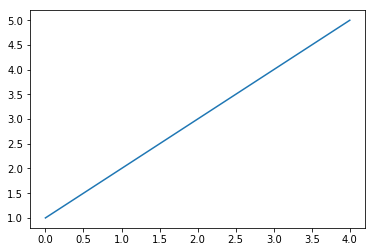

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot([1,2,3,4,5])
plt.show()

In [ ]:
path_config_file = "/home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/config.yaml"
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by Pia.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data/2005.01.01_20_10_08_labeled.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data/2005.01.01_20_10_40_labeled.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data/2005.01.01_20_12_15_labeled.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data/2005.01.01_20_12_48_labeled.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data/2005.01.01_20_15_19_labeled.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data/2005.01.01_20_44_53_labeled.
They are stored in the following folder: /home/sipila/work/projects/JointRunTracking-Pia-2020-03-04/labeled-data